## **ДАТАСЕТ ПИВА**
##### (ОПИСАНИЕ)
1. - Name: название пива
2. - Style: стиль пива
3. - Brewery: название пивоварни
4. - Beer Name (Full): полное имя пива
5. - Description: описание пива
6. - ABV: процент алкоголя на объем
7. - Min IBU: минимальное значение IBU, которое может иметь каждое пиво. IBU не было значением, доступным для каждого пива, но диапазон IBU для каждого стиля был
8. - Max IBU: максимальное значение IBU, которое может иметь каждое пиво. IBU не было значением, доступным для каждого пива, но диапазон IBU для каждого стиля был

##### (ОЩУЩЕНИЯ)
9. - Astringency - терпкость
10. - Body - густота, грубо говоря
11. - Alcohol - алкогольность

##### (ВКУС)
12. - Bitter - горький
13. - Sweet - сладкий
14. - Sour - кислый
15. - Salty - соленый

##### (АРОМАТ)
16. - Fruits - фрукты
17. - Hoppy - хмель
18. - Spices - специи
19. - Malty - солод

##### (ОЦЕНКИ)
20. - review_aroma - оценка аромата
21. - review_appearance - оценка внешнего вида
22. - review_palate - оценка вкуса
23. - review_taste - оценка вкусовых качеств
24. - review_overall - оценка общая
25. - number_of_reviews - кол-во оценок

#### **Удаляем ненужное**
Сразу можно удалить Name, Description, Brewery, Beer Name (Full) - поскольку это текстовые переменные, не имеющие значения для нашей задачи.
Также сразу удаляем Style - поскольку это зависимая переменная.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.model_selection import train_test_split

data = pd.read_csv('beer.csv')

data = data.dropna()

#BEEEEER
X = data.drop('Name', axis=1)
X = X.drop('Style', axis=1)
X = X.drop('Description', axis=1)
X = X.drop('Brewery', axis=1)
X = X.drop('Beer Name (Full)', axis=1)

#print(X)

data_stats = X.describe()
print(data_stats)

print(((X == 0).mean() * 100).round(2))

               ABV      Min IBU      Max IBU  Astringency         Body  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean      6.526688    21.180482    38.986863    16.515796    46.129496   
std       2.546997    13.242242    21.355281    10.410661    25.947842   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       5.000000    15.000000    25.000000     9.000000    29.000000   
50%       6.000000    20.000000    35.000000    14.000000    40.000000   
75%       7.600000    25.000000    45.000000    21.000000    58.000000   
max      57.500000    65.000000   100.000000    81.000000   175.000000   

           Alcohol       Bitter        Sweet         Sour        Salty  \
count  3197.000000  3197.000000  3197.000000  3197.000000  3197.000000   
mean     17.055990    36.364404    58.270879    33.145449     1.017204   
std      17.331334    25.791152    34.281310    35.780172     2.132651   
min       0.000000     0.000000     0

## **ДЕСКРИПТИВНЫЙ АНАЛИЗ**

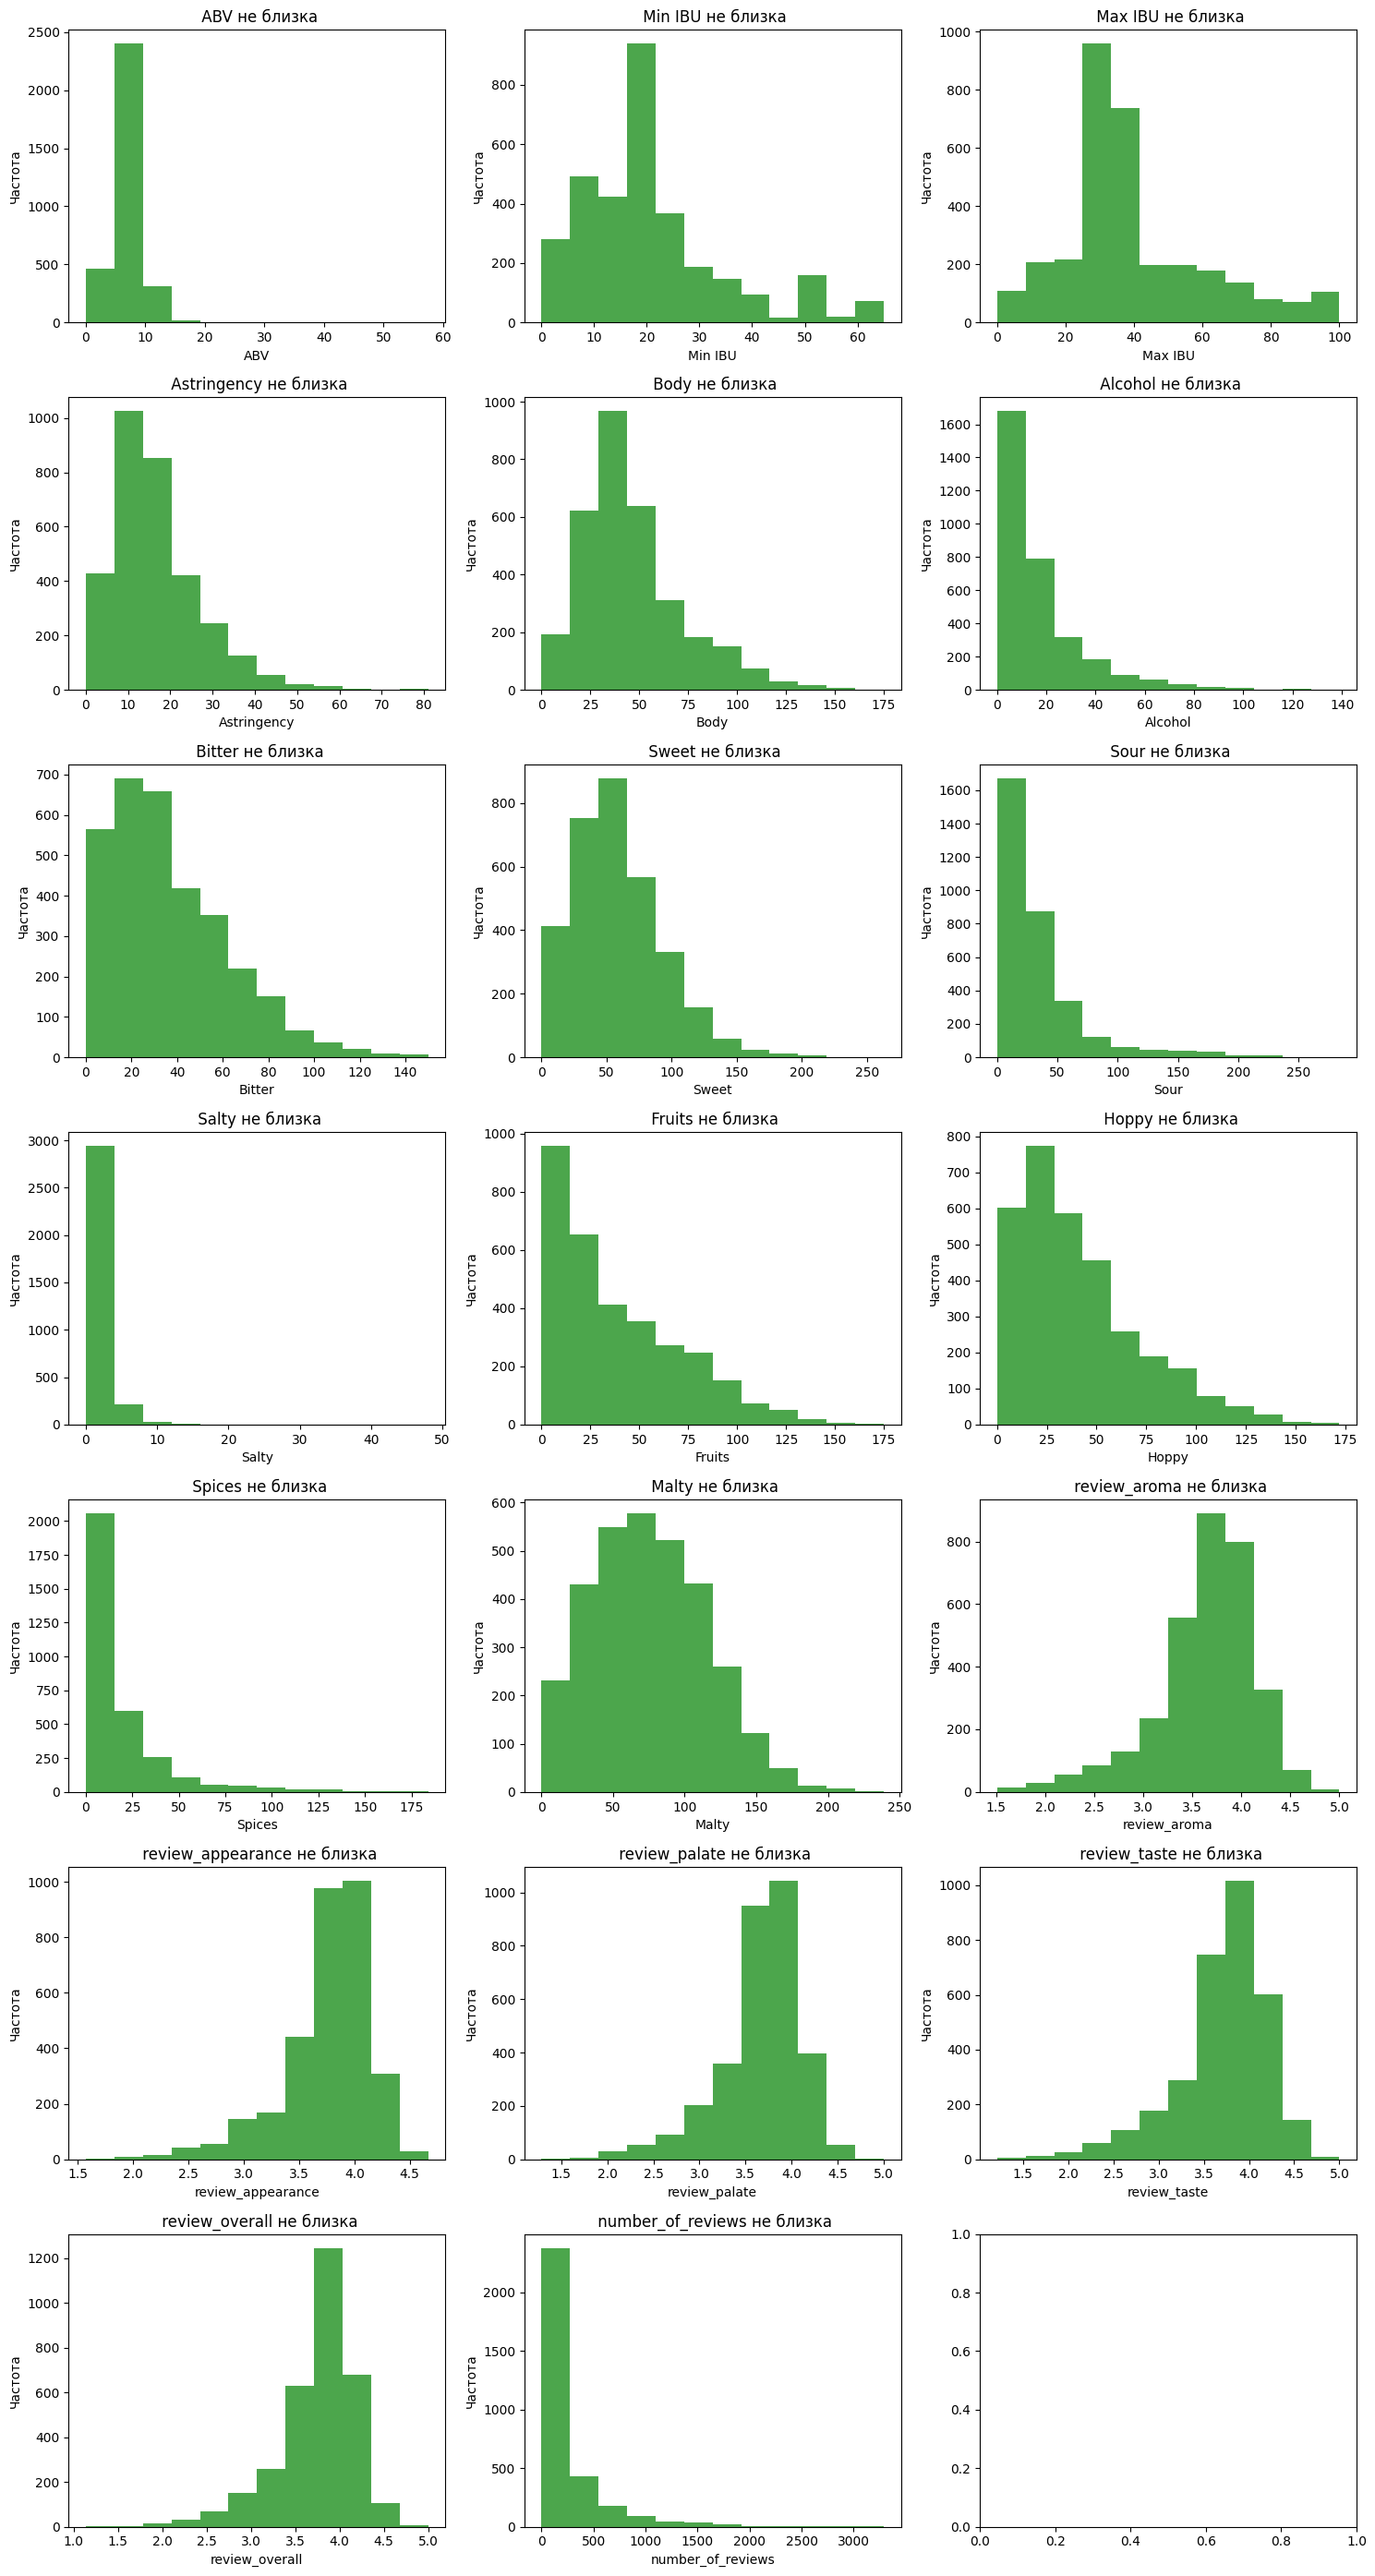

In [2]:
n_cols = 3
n_rows = math.ceil(len(X.columns) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

if n_rows > 1:
    axes = axes.flatten()
else:
    axes = [axes] if n_cols == 1 else axes

data_stats = X.describe()
alpha = 0.05
for i, column in enumerate(X.columns):
    sterdgess = math.floor(1 + 3.322*math.log(len(X[column]), 10))
    
    D, p_value = stats.kstest(X[column].values, 'norm', args=(data_stats.loc['mean', column], data_stats.loc['std', column]))
    
    axes[i].hist(X[column], bins=sterdgess, color='green', alpha=0.7)
    axes[i].set_title(f' {column}' + (' не ' if p_value < alpha else ' ') + 'близка')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Частота')
    
plt.tight_layout()
plt.show()

#### Ни один из признаков не близок к нормальному распределению.

## **КОРРЕЛЯЦИОННЫЙ АНАЛИЗ**

#### Снизим размерность признаков, чтобы выбросы не сильно отличались от всех признаков. Применим преобразование x_new = ln(x + 1)

In [3]:
X_log = X.copy()
X_initial = X.copy()

for col in X_log.select_dtypes(include=[np.number]).columns:
    if X_log[col].min() >= 0:
        p99 = X_log[col].quantile(0.99)
        outliers = X_log[col] > p99
        n_outliers = outliers.sum()
        if n_outliers > 0:
            print(f"{col}: {n_outliers} выбросов (> {p99:.2f}) → логарифмирование")
        X_log[col] = np.log1p(X_log[col])
    else:
        print(f"⚠️ {col} содержит отрицательные значения — пропущен")

X = X_log

ABV: 32 выбросов (> 13.40) → логарифмирование
Astringency: 31 выбросов (> 49.00) → логарифмирование
Body: 30 выбросов (> 128.00) → логарифмирование
Alcohol: 32 выбросов (> 84.04) → логарифмирование
Bitter: 27 выбросов (> 114.00) → логарифмирование
Sweet: 32 выбросов (> 160.08) → логарифмирование
Sour: 32 выбросов (> 182.04) → логарифмирование
Salty: 29 выбросов (> 8.00) → логарифмирование
Fruits: 27 выбросов (> 130.00) → логарифмирование
Hoppy: 32 выбросов (> 132.04) → логарифмирование
Spices: 29 выбросов (> 123.00) → логарифмирование
Malty: 30 выбросов (> 174.00) → логарифмирование
review_aroma: 31 выбросов (> 4.50) → логарифмирование
review_appearance: 32 выбросов (> 4.40) → логарифмирование
review_palate: 32 выбросов (> 4.48) → логарифмирование
review_taste: 32 выбросов (> 4.55) → логарифмирование
review_overall: 24 выбросов (> 4.50) → логарифмирование
number_of_reviews: 32 выбросов (> 1754.32) → логарифмирование


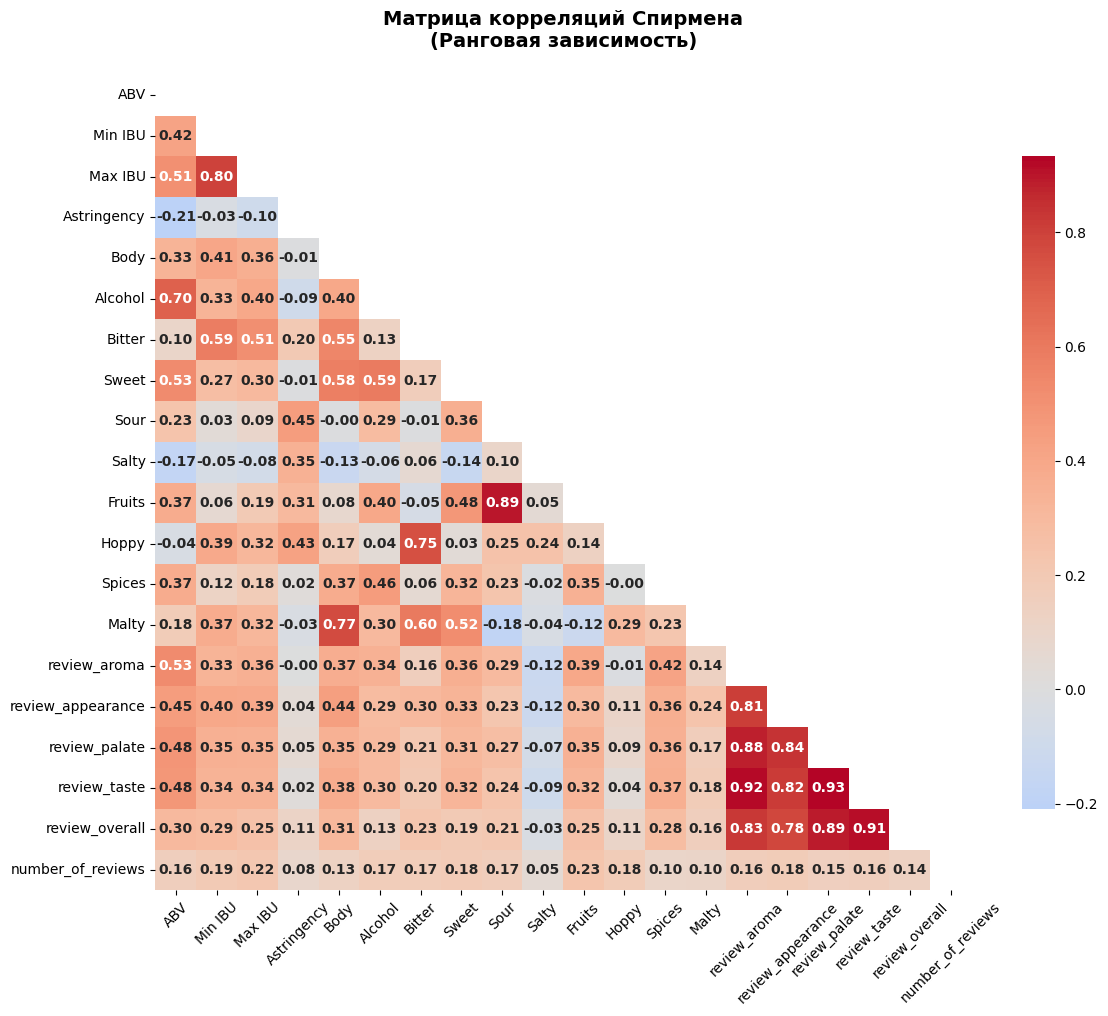

In [4]:
corr_spearman = X.corr(method='spearman')
mask_spearman = np.triu(np.ones_like(corr_spearman, dtype=bool))

plt.figure(figsize=(12, 10))
ax = plt.gca()

sns.heatmap(corr_spearman,
            mask=mask_spearman,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 10, 'weight': 'bold'},
            ax=ax)

ax.set_title('Матрица корреляций Спирмена\n(Ранговая зависимость)',
             fontsize=14, fontweight='bold', pad=20)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

### Корреляция может исказить результаты кластеризации, поэтому нужно убрать из датасета сильнокоррелированные признаки, или признаки описывающие одно и то же.
- По heatmap видно, что оценки сильно коррелируют друг с другом, поэтому удаляем все, кроме общей оценки.
- Наблюдается сильная корреляция Fruits и Sour, то есть фрукты влияют на кислость. Для нас важнее вкусовые качества, поэтому уберем фрукты
- Min и Max IBU коррелируют - это очевидно, есть смысл оставить что-то одно из этих показателей. Оставим Max IBU.
- Bitter имеет высокую корреляцию с Hoppy, и в целом с остальными признаками, поэтому уберем Bitter.
- ABV описывает, сколько алкоголя в пиве, а также есть Alcohol, который оценивает привкус алгольный. Поэтому уберем ABV.
- Body сильно коррелирует с Malty, Body по своей сути это вязкость, густота пива. Но солодовый вкус для нас информативнее. Убераем Body.
- Sweet достаточно сильно коррелирует с Malty и Alcohol. Уберем Sweet.



In [5]:
X = X.drop('review_taste', axis=1)
X = X.drop('review_palate', axis=1)
X = X.drop('review_appearance', axis=1)
X = X.drop('review_aroma', axis=1)
X = X.drop('Fruits', axis=1)
X = X.drop('Min IBU', axis=1)
X = X.drop('Bitter', axis=1)
X = X.drop('ABV', axis=1)
X = X.drop('Body', axis=1)
X = X.drop('Sweet', axis=1)

X_initial = X_initial.drop('review_taste', axis=1)
X_initial = X_initial.drop('review_palate', axis=1)
X_initial = X_initial.drop('review_appearance', axis=1)
X_initial = X_initial.drop('review_aroma', axis=1)
X_initial = X_initial.drop('Fruits', axis=1)
X_initial = X_initial.drop('Min IBU', axis=1)
X_initial = X_initial.drop('Bitter', axis=1)
X_initial = X_initial.drop('ABV', axis=1)
X_initial = X_initial.drop('Body', axis=1)
X_initial = X_initial.drop('Sweet', axis=1)

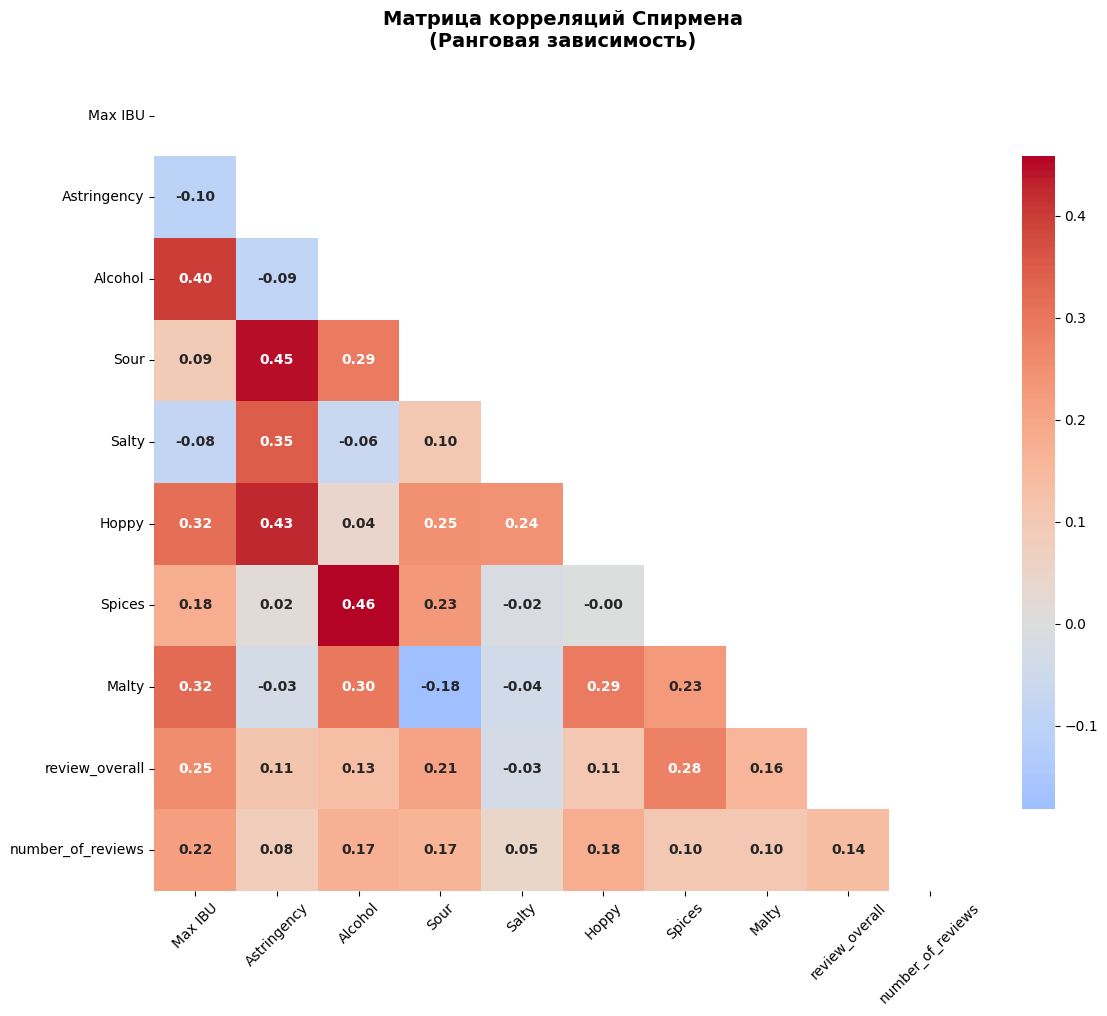

In [6]:
corr_spearman = X.corr(method='spearman')
mask_spearman = np.triu(np.ones_like(corr_spearman, dtype=bool))

# Создаём фигуру и ось
plt.figure(figsize=(12, 10))  # 20x8 может быть слишком широким → лучше 12x10 или 14x12 для heatmap
ax = plt.gca()

# Строим heatmap
sns.heatmap(corr_spearman,
            mask=mask_spearman,
            annot=True,
            fmt='.2f',
            cmap='coolwarm',
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8},
            annot_kws={'size': 10, 'weight': 'bold'},
            ax=ax)

ax.set_title('Матрица корреляций Спирмена\n(Ранговая зависимость)',
             fontsize=14, fontweight='bold', pad=20)
ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

#### Теперь остались только слабокоррелированные и умеренно коррелированные данные

#### Стандартизируем данные RobustScaler, так как он делает признаки устойчивыми к выбросам.

In [7]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

X = pd.DataFrame(X_scaled, columns=X.columns)

## **ДИАГРАММА РАССЕИВАНИЯ**

<Figure size 2000x2000 with 0 Axes>

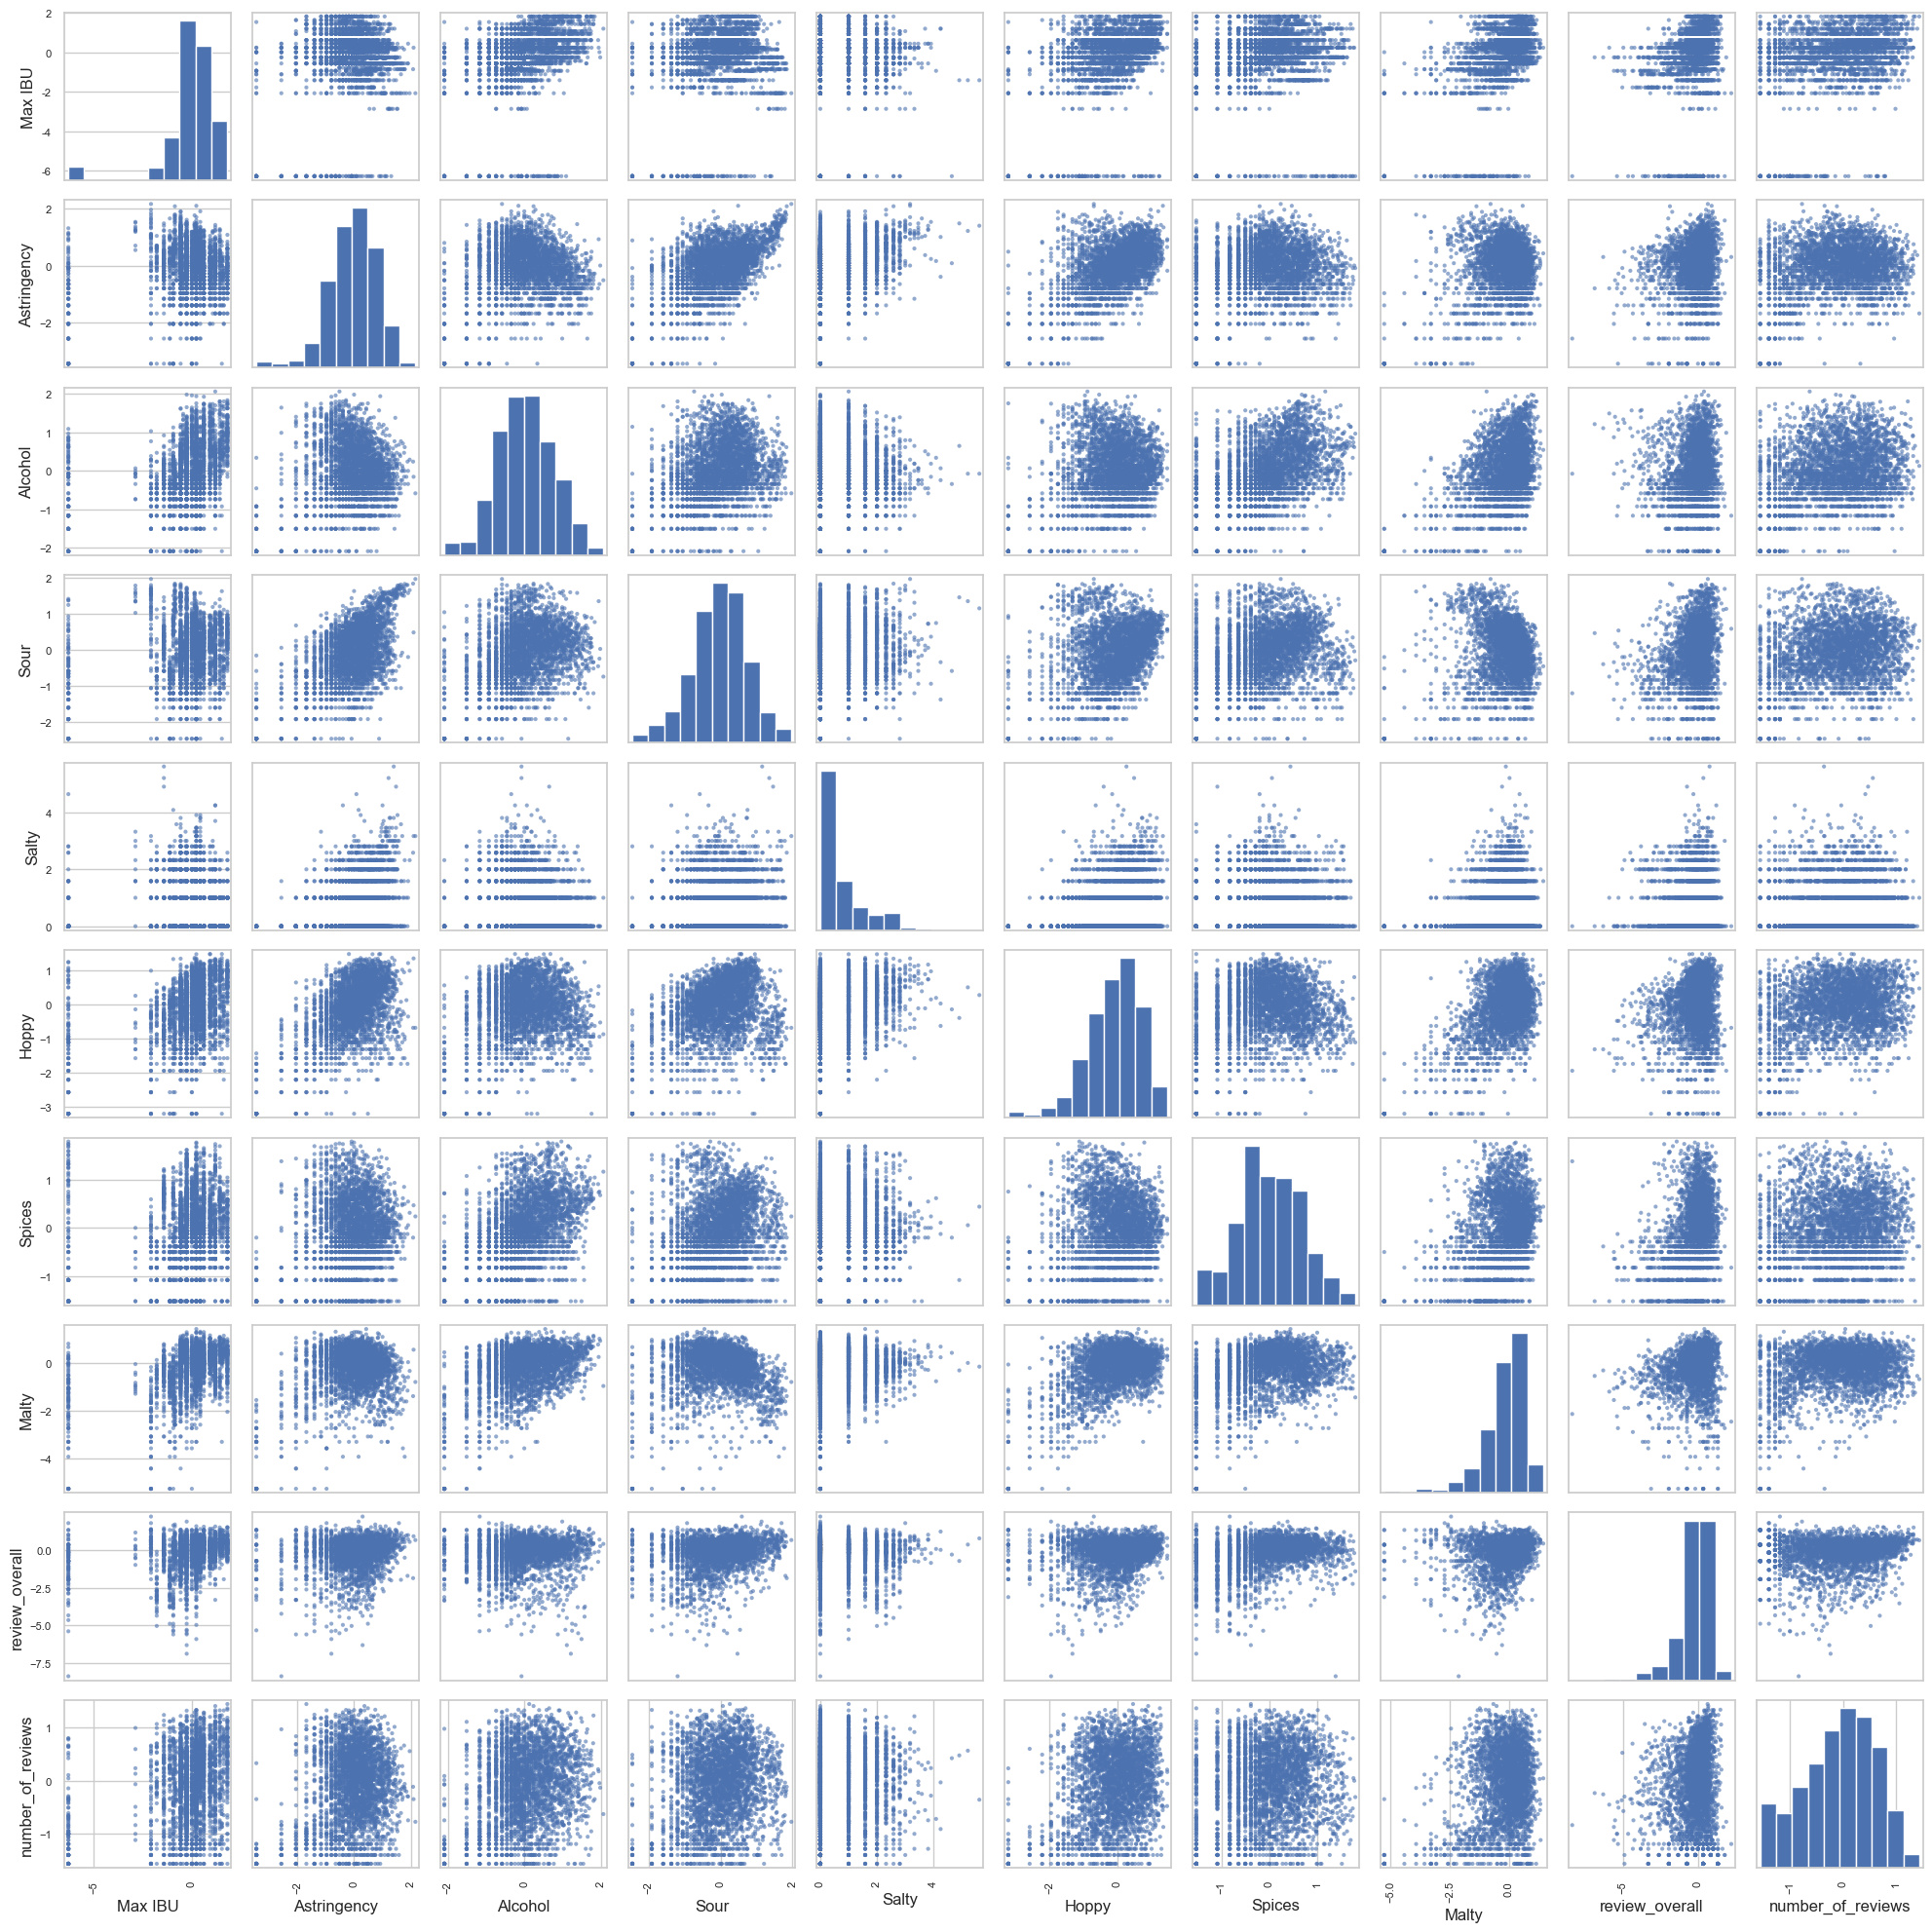

In [8]:
plt.style.use('default')
sns.set_theme(style="whitegrid")

fig = plt.figure(figsize=(20, 20))
pd.plotting.scatter_matrix(X, alpha=0.6, figsize=(20, 20), diagonal='hist')
plt.tight_layout()
plt.show()

### По диаграмме рассеивания видно, что много данных сбились в кучу, а остальные это полосы значений. Нельзя сразу определить какие могут получиться кластеры. Также ожидается много шумов в данных из-за большого кол-ва выбросов.

- ### K-means не подходит, так как нужно знать количество кластеров, которое ожидается получить. Также на диаграммах рассеивания не наблюдается сферических форм.
- ### Подходит DBSCAN, так как он умеет определять кластеры произвольной формы. Возможно лучше использовать HDBSCAN, так как он будет причислять меньше данных к шумам.
- ### EM-кластеризация не подходит, так как данные не расределены нормально.
- ### Можно попробовать спектральную кластеризацию, так как она тоже определяет произвольные формы, но нужно задать количество кластеров.

### **ВЫБРАННЫЕ МЕТОДЫ: HDBSCAN и СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ**

In [9]:
from sklearn.metrics import (
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
from scipy.spatial.distance import cdist

def evaluate_clustering(X, labels, name):
    df = {}

    # количество кластеров без шума
    mask = labels != -1
    unique_clusters = sorted(set(labels[mask]))
    df["method"] = name
    df["clusters"] = len(unique_clusters)
    df["noise%"] = round((labels == -1).mean() * 100, 2)

    # ——— Внутренние метрики ———
    if len(unique_clusters) >= 2:
        df["silhouette"] = silhouette_score(X[mask], labels[mask])
    else:
        df["silhouette"] = np.nan

    df["calinski_harabasz"] = calinski_harabasz_score(X[mask], labels[mask])
    df["davies_bouldin"] = davies_bouldin_score(X[mask], labels[mask])

    # ——— Центры кластеров ———
    centers = {}
    for c in unique_clusters:
        centers[c] = X[labels == c].mean(axis=0)

    # ——— Межкластерные расстояния ———
    if len(unique_clusters) >= 2:
        center_matrix = np.vstack([centers[c] for c in unique_clusters])
        inter_cluster = cdist(center_matrix, center_matrix, metric="euclidean")
        df["intercluster_mean"] = np.mean(inter_cluster[np.triu_indices_from(inter_cluster, 1)])
        df["intercluster_min"]  = np.min(inter_cluster[np.triu_indices_from(inter_cluster, 1)])
    else:
        df["intercluster_mean"] = np.nan
        df["intercluster_min"] = np.nan

    # ——— Внутрикластерные расстояния ———
    intra = []
    for c in unique_clusters:
        points = X[labels == c]
        dist = cdist(points, [centers[c]], metric="euclidean")
        intra.append(dist.mean())
    df["intra_mean"] = np.mean(intra)

    return df, centers

# **КЛАСТЕРИЗАЦИЯ**

## **HDBSCAN**

#### HDBSCAN — это алгоритм кластеризации, предназначенный для выявления кластеров в наборах данных на основе распределения плотности точек данных. В отличие от некоторых других методов кластеризации, он не требует предварительного указания количества кластеров, что делает его более адаптируемым к различным наборам данных. Он использует области высокой плотности для идентификации кластеров и рассматривает изолированные или малоплотные точки как шум. HDBSCAN особенно полезен для наборов данных со сложной структурой или различной плотностью, поскольку он создает иерархическое дерево кластеров, которое позволяет пользователям изучать данные на разных уровнях детализации.

#### HDBSAN анализирует плотность точек данных в наборе данных. Он начинает с расчета иерархии кластеризации на основе плотности, которая создает кластеры из плотно связанных точек данных. Эта иерархическая структура позволяет распознавать кластеры различной формы и размера.

#### Затем алгоритм извлекает кластеры из иерархии, учитывая стабильность назначений кластеров на разных уровнях иерархии. Он идентифицирует стабильные кластеры как те, которые имеют постоянное членство на нескольких уровнях, обеспечивая надежность формирования кластеров.

#### Кроме того, HDBSCAN различает шумовые и значимые кластеры, учитывая точки с низкой плотностью или не принадлежащие ни к одному кластеру. HDBSCAN улавливает и устраняет шум, постоянно корректируя параметр минимального размера кластера и добавляя минимальное охватывающее дерево.

c:\Users\maksg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maksg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


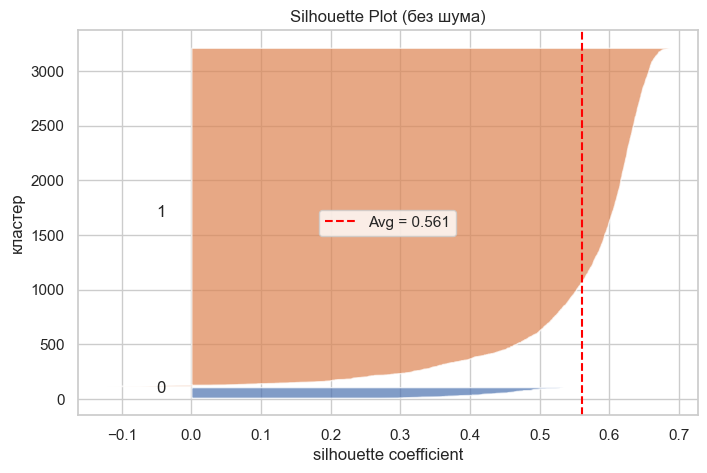

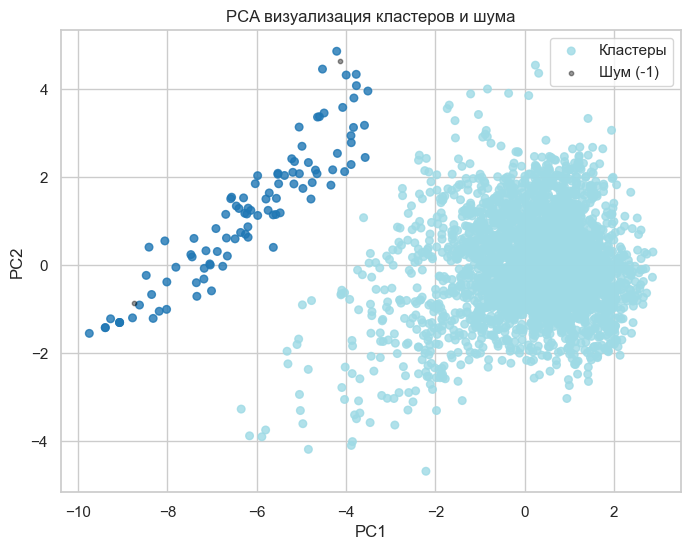


=== Количество точек в каждом кластере ===
cluster
-1       2
 0      98
 1    3097
Name: count, dtype: int64


,Max IBU,Astringency,Alcohol,Sour,Salty,Hoppy,Spices,Malty,review_overall,number_of_reviews
cluster,,,,,,,,,,
-1,0.000,8.000,8.500,7.000,12.000,15.500,51.500,58.500,2.414,138.500
0,0.000,8.755,10.163,17.878,0.500,21.398,31.224,31.418,3.436,57.673
1,40.246,16.767,17.280,33.645,1.026,41.559,17.917,76.731,3.758,238.903


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples
import numpy as np
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score
from hdbscan.validity import validity_index

X = X_scaled

clusterer = hdbscan.HDBSCAN(
                min_cluster_size=50,
                min_samples=10,
                metric='euclidean',
                cluster_selection_method='eom',
                prediction_data=True
            )
            
labels = clusterer.fit_predict(X)

            # метки без шума
mask = labels != -1
n_clusters = len(set(labels[mask]))

if n_clusters < 2:
    sil = np.nan
else:
    sil = silhouette_score(X[mask], labels[mask])

mask = labels != -1
X_no_noise = X[mask]
labels_no_noise = labels[mask]

if len(set(labels_no_noise)) > 1:

    sil_values = silhouette_samples(X_no_noise, labels_no_noise)
    sil_avg = sil_values.mean()

    fig, ax = plt.subplots(figsize=(8, 5))
    y_lower = 10
    unique_clusters = np.sort(np.unique(labels_no_noise))

    for c in unique_clusters:
        cluster_sil_vals = sil_values[labels_no_noise == c]
        cluster_sil_vals.sort()

        size = len(cluster_sil_vals)
        y_upper = y_lower + size

        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, 
            cluster_sil_vals,
            alpha=0.7
        )
        ax.text(-0.05, (y_lower + y_upper)/2, str(c))

        y_lower = y_upper + 10

    ax.axvline(sil_avg, color="red", linestyle="--", label=f"Avg = {sil_avg:.3f}")
    ax.set_title("Silhouette Plot (без шума)")
    ax.set_xlabel("silhouette coefficient")
    ax.set_ylabel("кластер")
    ax.legend()
    plt.show()

else:
    print("Silhouette plot невозможно построить — только один кластер (без шума).")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))

mask_clusters = labels != -1
plt.scatter(
    X_pca[mask_clusters, 0],
    X_pca[mask_clusters, 1],
    c=labels[mask_clusters],
    cmap="tab20",
    s=30,
    alpha=0.8,
    label="Кластеры"
)

# точки шума (-1)
mask_noise = labels == -1
plt.scatter(
    X_pca[mask_noise, 0],
    X_pca[mask_noise, 1],
    c="black",
    s=10,
    alpha=0.4,
    label="Шум (-1)"
)

plt.title("PCA визуализация кластеров и шума")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

df_cluster = pd.DataFrame(X_initial).copy()
df_cluster["cluster"] = labels

# Средние значения признаков по кластерам
cluster_profiles = df_cluster.groupby("cluster").mean()

# print("=== Средние значения признаков по кластерам ===")
# print(cluster_profiles.round(3))

# Количество точек в каждом кластере
counts = df_cluster["cluster"].value_counts().sort_index()

print("\n=== Количество точек в каждом кластере ===")
print(counts)

cluster_profiles.round(3)


### **Результаты**
- #### По результатам кластеризации получился средний силуэтный коэффициент 0.561, это неплохой результат для настоящих данных.
- #### Наблюдаем два кластера, большой и маленький, в маленьком всего 98 значений и он имеет маленькую плотность. У большого в целом большая плотность, но есть часть кластера, в которой точки отдалены друг от друга.
- #### Среднее значение силуэта для кластера 0 равно ~0.45, это неплохое значение, но кластер скорее всего ненадежный.
- #### Среднее значение силуэта для кластера 1 равно ~0.57, видно что большая часть точек хорошо описывается этим кластером.


### **График иерархии HDBSCAN**

<Axes: ylabel='$\\lambda$ value'>

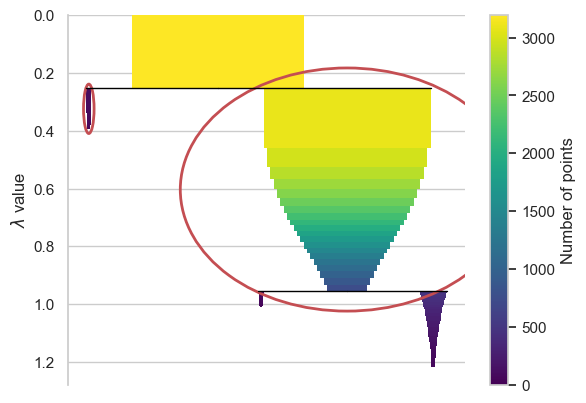

In [11]:
clusterer.condensed_tree_.plot(select_clusters=True)

#### По графику видно, что HDBSCAN выбрал два кластера, обведенных в красные круги. 
- #### Левый кластер - это кластер 0, у него маленькое значение lambda, что означает, что этот кластер имеет низкую плотность (это видно и на PCA проекции).
- #### Правый кластер - это кластер 1, у него высокая плотность и наибольшее кол-во точек.
- #### Две нижних иерархии это то, что алгоритм посчитал шумами
#### В целом можно сказать, что левый кластер 0 - это ненадежный кластер и, возможно, его можно отбросить

In [12]:
hdb_results, hdb_centers = evaluate_clustering(X_scaled, labels, "HDBSCAN")

## **СПЕКТРАЛЬНАЯ КЛАСТЕРИЗАЦИЯ**

#### Спектральная кластеризация — метод кластеризации на основе спектральных свойств матрицы сходства графа, который представляет собой набор точек данных, связанных друг с другом в зависимости от их сходства. Основная идея заключается в преобразовании матрицы сходства графа в лаплассиан для получения его собственных векторов, которые в дальнейшем используются для проекции данных в новое пространство более низкой размерности для лучшей разделимости, где затем применяется другой метод кластеризации, например, такой как K-средних.

#### Существуют различные способы построения матрицы сходства, среди которых наиболее популярными являются следующие:

- ##### nearest_neighbors (путём вычисления графа ближайших соседей);
- ##### rbf (с использованием радиальной базисной функции);
- ##### предварительно вычисленные, где признаки представлены как матрица сходства или граф ближайших соседей;
- ##### различные ядра: xi-квадрат, линейное, полиномиальное, сигмоидальное и другие.

Silhouette Score: 0.5630
Calinski-Harabasz: 677.1
Davies-Bouldin: 0.8250
Размеры кластеров:
0    3097
1     100
Name: count, dtype: int64


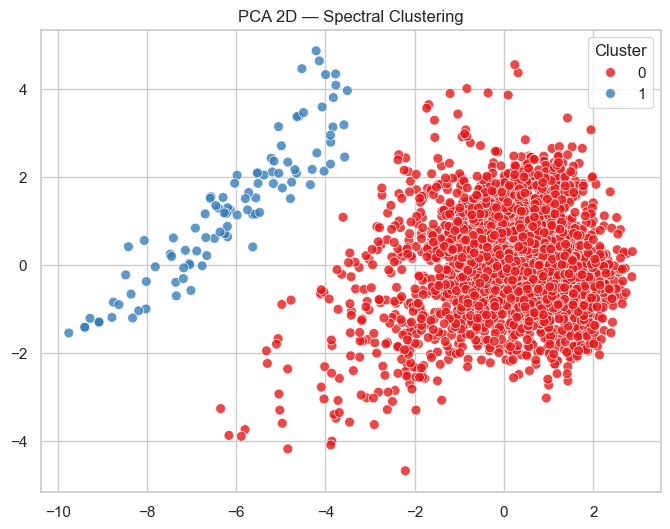

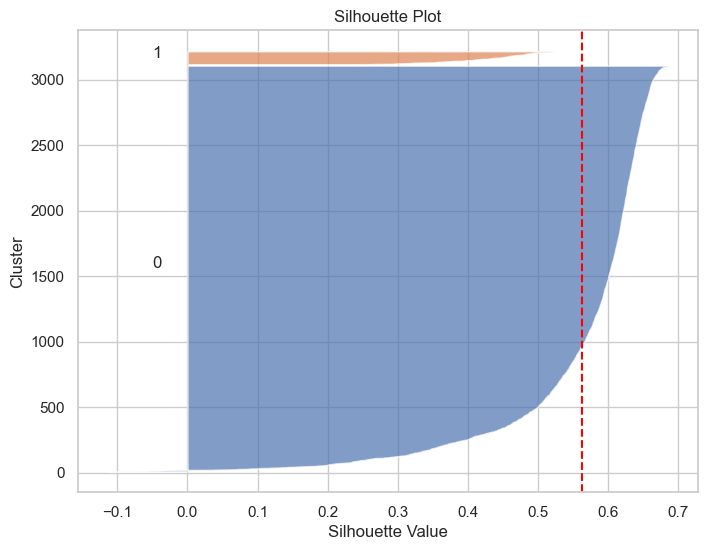


Средние значения признаков по кластерам:
         Max IBU  Astringency  Alcohol    Sour  Salty   Hoppy  Spices   Malty  \
Cluster                                                                         
0         40.246       16.767    17.28  33.645  1.026  41.559  17.917  76.731   
1          0.000        8.740    10.13  17.660  0.730  21.280  31.630  31.960   

         review_overall  number_of_reviews  
Cluster                                     
0                 3.758            238.903  
1                 3.416             59.290  


In [13]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = X_scaled

model = SpectralClustering(
    n_clusters=2,
    affinity='rbf',
    gamma=0.2,
    assign_labels="kmeans",
    random_state=42
)

labels = model.fit_predict(X)

if len(set(labels)) == 1:
    sil = np.nan
    sample_sil = None
else:
    sil = silhouette_score(X, labels)
    sample_sil = silhouette_samples(X, labels)

ch = calinski_harabasz_score(X, labels)
db = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {sil:.4f}")
print(f"Calinski-Harabasz: {ch:.1f}")
print(f"Davies-Bouldin: {db:.4f}")
print("Размеры кластеров:")
print(pd.Series(labels).value_counts())


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.title("PCA 2D — Spectral Clustering")
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=labels,
    palette="Set1",
    alpha=0.8,
    s=50
)
plt.legend(title="Cluster")
plt.show()


if sample_sil is not None:
    fig, ax = plt.subplots(figsize=(8,6))

    y_lower = 10
    for cluster in np.unique(labels):
        cluster_vals = sample_sil[labels == cluster]
        cluster_vals.sort()
        size = len(cluster_vals)
        y_upper = y_lower + size

        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0, cluster_vals,
            alpha=0.7
        )
        ax.text(-0.05, y_lower + size / 2, str(cluster))
        y_lower = y_upper + 10

    ax.axvline(x=sil, color="red", linestyle="--")
    ax.set_title("Silhouette Plot")
    ax.set_xlabel("Silhouette Value")
    ax.set_ylabel("Cluster")
    plt.show()
else:
    print("Невозможно построить силиуэт — только один кластер.")

df_initial = pd.DataFrame(X_initial, columns=X_initial.columns)
df_initial["Cluster"] = labels

cluster_means = df_initial.groupby("Cluster").mean().round(3)

print("\nСредние значения признаков по кластерам:")
print(cluster_means)


### **Результаты**
#### Спектральная кластеризация кластеры, такие же как и HDBSCAN. 

In [14]:
spec_results, spec_centers = evaluate_clustering(X_scaled, labels, "Spectral")

In [15]:
df_results = pd.DataFrame([hdb_results, spec_results])
print(df_results)

print("\n=== Центры кластеров HDBSCAN ===")
for k, v in hdb_centers.items():
    print(f"Кластер {k}: {np.round(v, 3)}")

print("\n=== Центры кластеров Spectral ===")
for k, v in spec_centers.items():
    print(f"Кластер {k}: {np.round(v, 3)}")

     method  clusters  noise%  silhouette  calinski_harabasz  davies_bouldin  \
0   HDBSCAN         2    0.06    0.561498         666.160522        0.815367   
1  Spectral         2    0.00    0.562985         677.072932        0.824972   

   intercluster_mean  intercluster_min  intra_mean  
0           6.844586          6.844586    2.790423  
1           6.845109          6.845109    2.823511  

=== Центры кластеров HDBSCAN ===
Кластер 0: [-6.281 -1.114 -0.503 -0.785  0.35  -1.163 -0.162 -1.658 -0.96  -0.856]
Кластер 1: [ 0.037 -0.008  0.044 -0.015  0.66  -0.056  0.007 -0.159 -0.202 -0.05 ]

=== Центры кластеров Spectral ===
Кластер 0: [ 0.037 -0.008  0.044 -0.015  0.66  -0.056  0.007 -0.159 -0.202 -0.05 ]
Кластер 1: [-6.281 -1.117 -0.497 -0.787  0.389 -1.16  -0.147 -1.642 -1.028 -0.843]


- #### Calinski–Harabasz Index (CH) - соотношение разброса между кластерами и разброса внутри кластеров, у обоих методов хорошая.
- #### Davies–Bouldin Index (DBI) - насколько кластер похож на другие кластеры похожие на него. 0.8 это хорошое разделение, но не идеальное, у обоих методов среднее значение.
- #### intercluster_mean (среднее межкластерное расстояние) - кластеры хорошо разделены по центрам кластеров друг от друга
- #### intercluster_min (минимальное межкластерное расстояние) - близко расположенные кластеры, кластеры расположены не близко друг к другу (6.8)
- #### intra_mean (среднее внутрикластерное расстояние) - 2.79–2.82 это средняя плотность в кластерах.
- #### Центры кластеров почти идеально совпадают между методами.



# **ИССЛЕДОВАНИЕ ГИПЕРПАРАМЕТРОВ**
## **HDBSCAN**

In [16]:
import numpy as np
import pandas as pd
import hdbscan
from sklearn.metrics import silhouette_score

X = X_scaled

min_cluster_sizes = [5, 10, 20, 30, 50]
min_samples_list = [5, 10, 20, 30, 50]
metrics = ["euclidean"]

results = []

for mcs in min_cluster_sizes:
    for ms in min_samples_list:
        for met in metrics:

            clusterer = hdbscan.HDBSCAN(
                min_cluster_size=mcs,
                min_samples=ms,
                metric=met,
                cluster_selection_method='eom',
                prediction_data=True
            )
            
            labels = clusterer.fit_predict(X)

            # маска без шума
            mask = labels != -1
            n_clusters = len(set(labels[mask]))

            # silhouette возможно только если ≥2 кластера
            if n_clusters >= 2:
                sil = silhouette_score(X[mask], labels[mask])
            else:
                sil = np.nan

            # доля шума
            noise_pct = round((labels == -1).mean() * 100, 2)

            # сохраняем результаты
            results.append({
                "min_cluster_size": mcs,
                "min_samples": ms,
                "metric": met,
                "clusters": n_clusters,
                "noise%": noise_pct,
                "silhouette": sil
            })

# таблица результатов
df = pd.DataFrame(results).sort_values("silhouette", ascending=False)
print(df)


c:\Users\maksg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maksg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maksg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maksg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\maksg\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\d

    min_cluster_size  min_samples     metric  clusters  noise%  silhouette
0                  5            5  euclidean         2    0.06    0.561498
1                  5           10  euclidean         2    0.06    0.561498
6                 10           10  euclidean         2    0.06    0.561498
5                 10            5  euclidean         2    0.06    0.561498
16                30           10  euclidean         2    0.06    0.561498
15                30            5  euclidean         2    0.06    0.561498
10                20            5  euclidean         2    0.06    0.561498
11                20           10  euclidean         2    0.06    0.561498
20                50            5  euclidean         2    0.06    0.561498
21                50           10  euclidean         2    0.06    0.561498
2                  5           20  euclidean         2    0.50    0.549255
7                 10           20  euclidean         2    0.50    0.549255
22                50     

#### Как видно из результатов, наибольший silhouette score 0.561. Это достигается при разном наборе гиперпараметров, что дает нам понять, что кластеры надежны.
#### Уменьшаться качество начинает при увеличении min_samples, этот параметр указывает плотность соседей вокруг точки.

## **SPECTRAL**

In [17]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score

X = X_scaled

results = []

kernels = ["rbf"]
clusters_list = [2, 3, 4]
assign_methods = ["kmeans", "discretize"]
gammas = [0.1, 0.2, 0.5]


for kernel in kernels:
    for n_cl in clusters_list:
        for assign in assign_methods:
            gamma_list = gammas if kernel == "rbf" else [None]
            
            for g in gamma_list:
                
                model = SpectralClustering(
                    n_clusters=n_cl,
                    affinity=kernel,
                    gamma=g if kernel == "rbf" else None,
                    assign_labels=assign,
                    random_state=42
                )

                labels = model.fit_predict(X)

                if len(set(labels)) < 2:
                    sil = np.nan
                else:
                    sil = silhouette_score(X, labels)
                
                (unique, counts) = np.unique(labels, return_counts=True)
                cluster_sizes = {f"size_{int(u)}": int(c) for u, c in zip(unique, counts)}

                results.append({
                    "affinity": kernel,
                    "gamma": g,
                    "n_clusters": n_cl,
                    "assign_labels": assign,
                    "silhouette": sil,
                    "cluster_sizes": cluster_sizes
                })

df = pd.DataFrame(results)
df = df.sort_values("silhouette", ascending=False)

print(df)


   affinity  gamma  n_clusters assign_labels  silhouette  \
0       rbf    0.1           2        kmeans    0.615799   
3       rbf    0.1           2    discretize    0.565328   
1       rbf    0.2           2        kmeans    0.562985   
2       rbf    0.5           2        kmeans    0.562985   
4       rbf    0.2           2    discretize    0.562985   
5       rbf    0.5           2    discretize    0.562985   
6       rbf    0.1           3        kmeans    0.544161   
9       rbf    0.1           3    discretize    0.543073   
7       rbf    0.2           3        kmeans    0.542830   
8       rbf    0.5           3        kmeans    0.542830   
11      rbf    0.5           3    discretize    0.542088   
10      rbf    0.2           3    discretize    0.541351   
12      rbf    0.1           4        kmeans    0.524873   
15      rbf    0.1           4    discretize    0.519650   
14      rbf    0.5           4        kmeans    0.517395   
17      rbf    0.5           4    discre

#### Провели тест на rbf, хоть наибольшее качество и получается при gamma = 0.1, при этом размер второго кластера оказывается абсолютно незначительным (14 из 3200). При этом если выбрать алгоритм определения кластеров "discrete orthogonalization", то значение силуэта упадет, но во втором кластере окажется уже 95 значений.
#### При увеличении кол-ва кластеров, метод делит меньший кластер на более меньшие.

# **ВЫВОДЫ**
#### **Интерпретация кластеров на примере HDBSCAN**
- #### -1. - это шумы. Описывает пиво плохого качества. Средняя оценка пива 2.4 из 5, но при этом, достаточно много отзывов - значит дешевое. Алкогольного вкуса почти нет. Очень соленое. Очень много специй. Много солода, мало хмеля.
- #### 0. - маленький кластер. Описывает пиво среднего качества. Средняя оценка 3.4 из 5, мало отзывов. Пиво не соленое, не солодовое, не хмельное, не кислое, средне алкогольное, средне терпкое.
- #### 1. - большой кластер. Описывает пиво хорошего качества. Средняя оценка 3.8 из 5, много отзывов. Это пиво пользуется спросом. Оно алкогольное, легкая соленость, кисленькое, солодовое, хмельное.


#### В ходе лабораторной были изучены основы кластеризации. По изначальным данным и диаграммам рассеивания были подобраны подходящие методы кластеризации, а именно HDBSCAN и Спектральная кластеризация. Как результат в обоих методах получили два кластера, один содержал в себе большую часть датасета и описывал хорошее пиво, а второй кластер был маленький и описывал пиво среднего качества. По коэффициенту силуэтов можно сказать, что кластеры не обладают сильной надежностью, но это нормально в рамках того, что на анализ взят датасет из реальных данных. Для такого датасета это хороший результат.